# Import libraries

In [2]:
# Dataset link 
# https://www.kaggle.com/danielgrijalvas/movies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [87]:
data = pd.read_csv(r"C:\Users\admin\Desktop\Python Projects\movies.csv")

In [5]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Explore the data

In [9]:
data.isnull().sum() #let`s see if their is any missing values

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [12]:
data.shape #let`s see how many rows and columns we have 

(7668, 15)

In [13]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

# Data Cleaning

In [15]:
# since we have 7668 rows in total and 
# company and runtime columns have 17 and 4 missing values respectively so dropping these 
# rows won`t effect the data 
# so let`s drop these rows

data.dropna(subset=["company","runtime"],inplace=True)

In [18]:
# let`s replace missing values in budget and gross columns with the mean
mean_budget = data["budget"].mean()
mean_gross = data["gross"].mean()
data["budget"].fillna(value=mean_budget,inplace=True)
data["gross"].fillna(value=mean_gross,inplace=True)

In [23]:
# since rating column has 71 missing values and it is non-numerical column
# let`s replace it`s missing values with mode
rating_mode = data["rating"].mode()
data["rating"]=data["rating"].fillna(value=rating_mode)

In [25]:
#let`s remove the rows of all other columns who have missing values less then 4
data.dropna(subset=["score","votes","star","country","writer"],inplace=True)

In [26]:
data.isnull().sum()

name         0
rating      69
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [28]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [29]:
# change data types of columns
data["budget"]=data["budget"].astype("int64")
data["gross"]=data["gross"].astype("int64")

In [43]:
# let`s split the year out of the column "released" 
data["year_correct"]=data['released'].str.split(',').str[1]
data["year_correct"]=data['year_correct'].str.split('(').str[0]

In [52]:
# let`s remove country from the column released as we have the country column already
data["released"]= data["released"].str.split("(").str[0]


In [55]:
#let`s see if we have any duplicate rows
data[data.duplicated()] # so we have no duplicate rows :D hurrrayyyyy

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct


# Correlation 

In [57]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


Text(0, 0.5, 'Revenue')

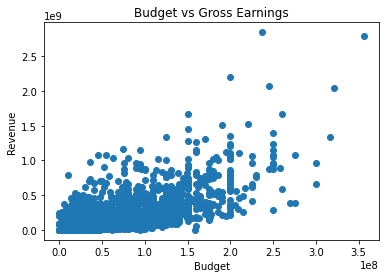

In [63]:
# let`s see the correlatio between budget and gross
# scatter plot
plt.scatter(x=data["budget"],y=data["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Revenue")

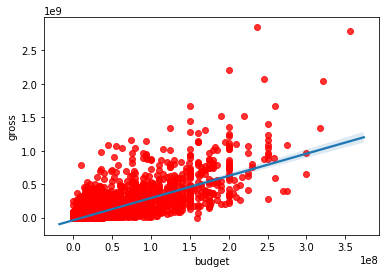

In [73]:
# plot Budget vs Gross using seaborn
sns.regplot(x="budget",y="gross",data=data,scatter_kws={"color":"red"})
# so we see the high positive correlation between budget and gross which means the higher the budget the more the revenue.

In [75]:
# let`s see the correlation
data.corr() #only working on the numerical fields but not on company or name etc

,year,score,votes,budget,gross,runtime
year,1.000000,0.098278,0.223353,0.267174,0.252423,0.119789
score,0.098278,1.000000,0.409432,0.064174,0.182861,0.399965
votes,0.223353,0.409432,1.000000,0.420811,0.628736,0.308907
budget,0.267174,0.064174,0.420811,1.000000,0.711595,0.265084
gross,0.252423,0.182861,0.628736,0.711595,1.000000,0.241291
runtime,0.119789,0.399965,0.308907,0.265084,0.241291,1.000000


Text(51.0, 0.5, 'Movie Features')

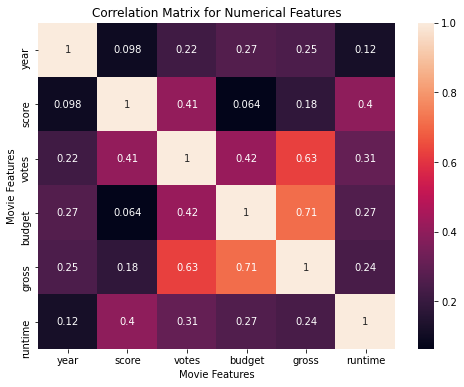

In [84]:
plt.figure(figsize=(8,6))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numerical Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [85]:
#let`s see the correlation between company vs gross
#but since company is non-numerical field so we have to convert it to the numerical one
data_numerized = data
for col_name in data_numerized.columns:
    if(data_numerized[col_name].dtype == "object"):
        data_numerized[col_name] = data_numerized[col_name].astype("category")
        data_numerized[col_name] = data_numerized[col_name].cat.codes
data_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6566,6,6,1980,1507,8.4,927000.0,2577,3999,1041,54,19000000,46998772,2312,146.0,0
1,5555,6,1,1980,1308,5.8,65000.0,2260,1628,325,55,4500000,58853106,727,104.0,0
2,5126,4,0,1980,1565,8.7,1200000.0,1109,2558,1737,55,18000000,538375067,1533,124.0,0
3,285,4,4,1980,1308,7.7,221000.0,1297,1994,2236,55,3500000,83453539,1805,88.0,0
4,1026,6,4,1980,1357,7.3,108000.0,1052,518,408,55,6000000,39846344,1770,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,797,6,6,2020,972,6.6,35.0,1761,1065,527,55,5000,78604979,1741,78.0,40
7659,2648,3,9,2020,1889,3.4,447.0,1605,2457,1526,55,35632927,13266,1985,87.0,40
7660,337,-1,4,2020,2411,7.1,14.0,2579,3976,194,55,35632927,78604979,83,90.0,40
7664,1676,-1,4,2020,972,4.7,36.0,773,2605,1878,55,35632927,78604979,535,90.0,40


Text(68.59375, 0.5, 'Movie Features')

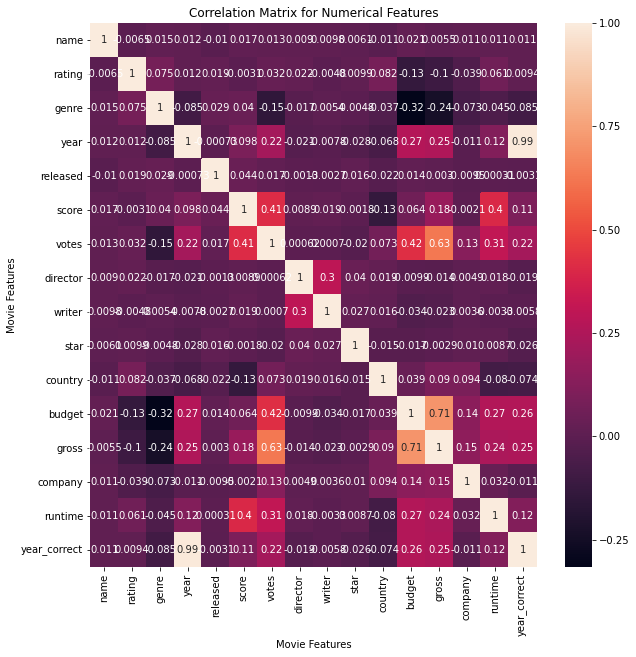

In [93]:
plt.figure(figsize=(10,10))
correlation_matrix=data_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numerical Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [94]:
# votes and the budget have highest correlation to gross earnings 